In [1]:
import rebound
import reboundx
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.append('../')

from ic import output, initialize, plotsa

In [2]:
from collections import OrderedDict
planets = ['b', 'c', 'd', 'e', 'f', 'g', 'h']
resonances = OrderedDict([(('b','c'),(8,5)),(('c','d'),(5,3)),(('d','e'),(3,2)),(('e','f'),(3,2)),(('f','g'),(4,3)),(('g','h'),(3,2))]) # ordered so we add planets in right sequence
threebodyresonances = OrderedDict([(('b','c','d'),(2,3)),(('c','d','e'),(1,2)),(('d','e','f'),(2,3)),(('e','f','g'),(1,2)),(('f','g','h'),(1,1))])

In [5]:
import matplotlib.lines as mlines

def plotscaling(mag, taues):
    fig, axarr = plt.subplots(ncols=1, nrows=3, figsize=(18,10))
    colors = ['red','blue','green','cyan','magenta','yellow','black']
    handles = []

    for i, taue in enumerate(taues):
        filename='data/mag{0:.4e}taue{1:.2e}.bin'.format(mag,taue)
        sa = rebound.SimulationArchive(filename)

        color = colors[i]

        Nout = len(sa)
        N = sa[0].N

        outputs = initialize(planets, resonances, threebodyresonances)
        E = np.zeros(Nout)
        Lz = np.zeros(Nout)
        for i,sim in enumerate(sa):
            ps = sim.particles
            output(sim,planets,resonances,threebodyresonances,outputs)
            E[i] = sim.calculate_energy()
            x,y,Lz[i] = sim.calculate_angular_momentum()

        t, e, P, Pratio, phi1, phi2, deltapomega, phi3body = outputs
        compressionfactor = 1.e6*(taue/100)
        for key in t.keys():
            t[key] = [time/compressionfactor for time in t[key]]

        for p in planets[:2]:
            axarr[0].plot(t[p], e[p], '.', color=color, alpha=0.1)

        for resonance in resonances.items():
            pair = resonance[0]
            res = resonance[1]
            resratio = res[0]/res[1] 
            axarr[1].plot(t[pair], np.array(Pratio[pair])-resratio, '.', color=color, alpha=0.1)
            
        axarr[2].plot(t['b'], E, '.', color=color, alpha=0.1)
        #for resonance in threebodyresonances.items():
        #    triad = resonance[0]
        #    axarr[1].plot(t[triad], phi3body[triad], '.', color=color, alpha=0.1)

        handles.append(mlines.Line2D([], [], color='white', marker='.',markersize=15, markerfacecolor=color, label="{0:.1e}".format(taue)))

    for ax in axarr.flatten():
        ax.legend(handles=handles, numpoints=1, loc='upper left')
    
    return fig

0.001


/mnt/raid-cita/dtamayo/p3new/lib/python3.4/site-packages/rebound/simulationarchive.py:63: RuntimeWarning: Binary file was saved with a different version of REBOUND. Binary format might have changed.
  warnings.warn(BINARY_WARNINGS[1][0], RuntimeWarning)


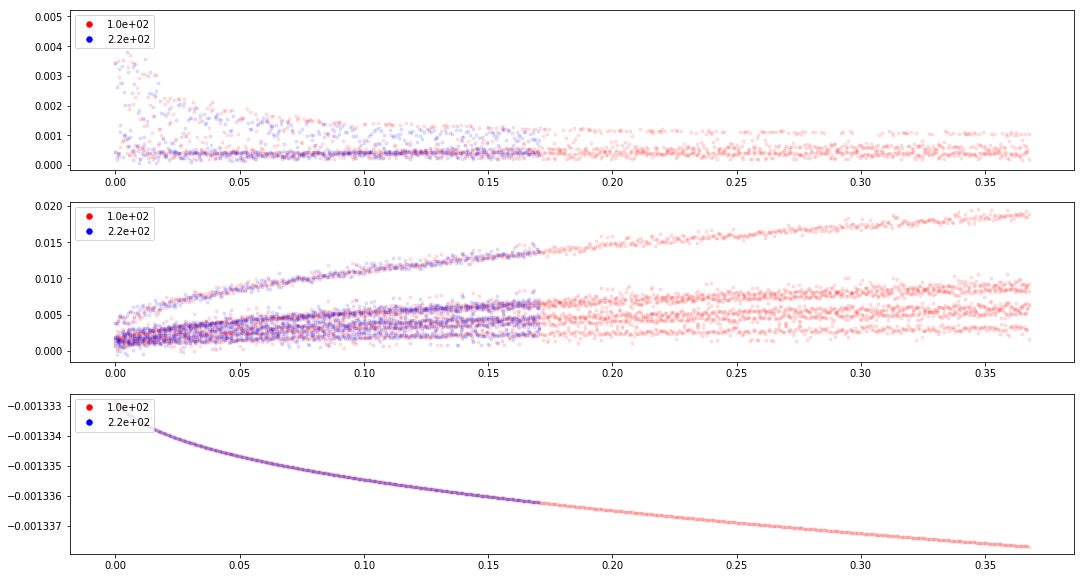

In [6]:
taues = np.logspace(1,3,7)
taues = taues[3:5]
mags = [1.e-3,1.e-2]

mag = mags[0]
print(mag)

plotscaling(mag, taues);

0.01


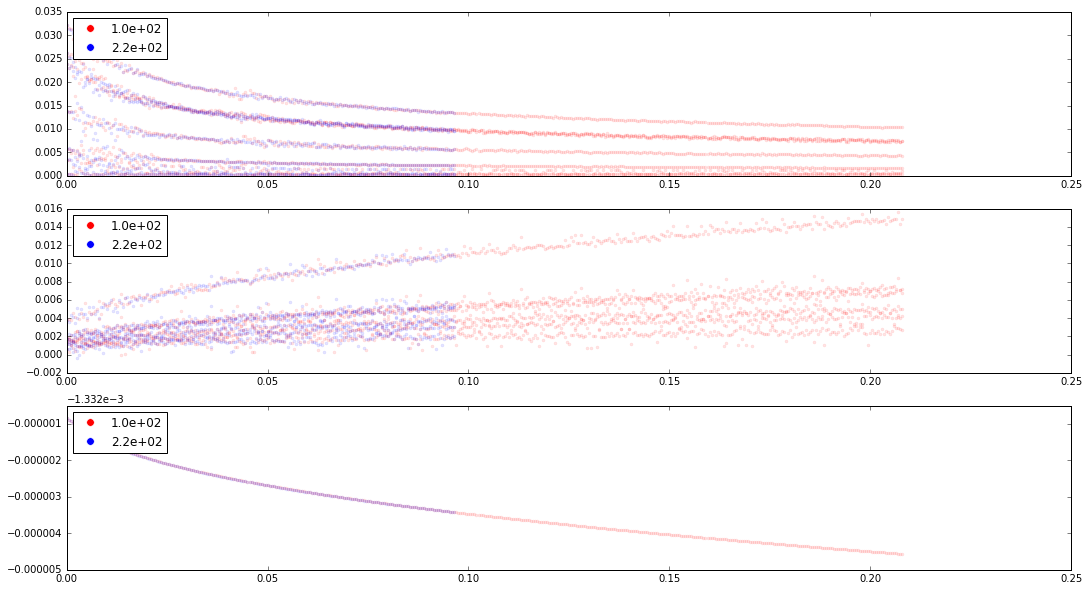

In [15]:
mag = mags[1]
print(mag)

plotscaling(mag, taues);